<a href="https://colab.research.google.com/github/tinazhang0329/422-Final-Project/blob/main/liver_disease_prediction_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project Liver Disease Prediction**

**Group 2: Selina Meng, Tina Zhang, Tianchuzi Qin, Yuyang Chen**

# Import

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import zscore

In [65]:
df = pd.read_csv('/content/drive/MyDrive/MSDS422_FINAL/Liver Patient Dataset (LPD)_train.csv', encoding='latin-1')
# or try 'ISO-8859-1' if 'latin-1' doesn't work

# EDA

## Data presentation

In [66]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [67]:
print(df.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


In [68]:
df = df.rename({'Age of the patient': 'Age',
                'Gender of the patient': 'Gender'}, axis='columns')
df.columns = df.columns.str.strip()

In [69]:
 # statistics summary
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [70]:
# check null
df.isnull().sum()

,0
Age,2
Gender,902
Total Bilirubin,648
Direct Bilirubin,561
Alkphos Alkaline Phosphotase,796
Sgpt Alamine Aminotransferase,538
Sgot Aspartate Aminotransferase,462
Total Protiens,463
ALB Albumin,494
A/G Ratio Albumin and Globulin Ratio,559


In [71]:
# check data types
print(df.dtypes)

# convert categorical x
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


Age                                     float64
Gender                                   object
Total Bilirubin                         float64
Direct Bilirubin                        float64
Alkphos Alkaline Phosphotase            float64
Sgpt Alamine Aminotransferase           float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


## Correlation

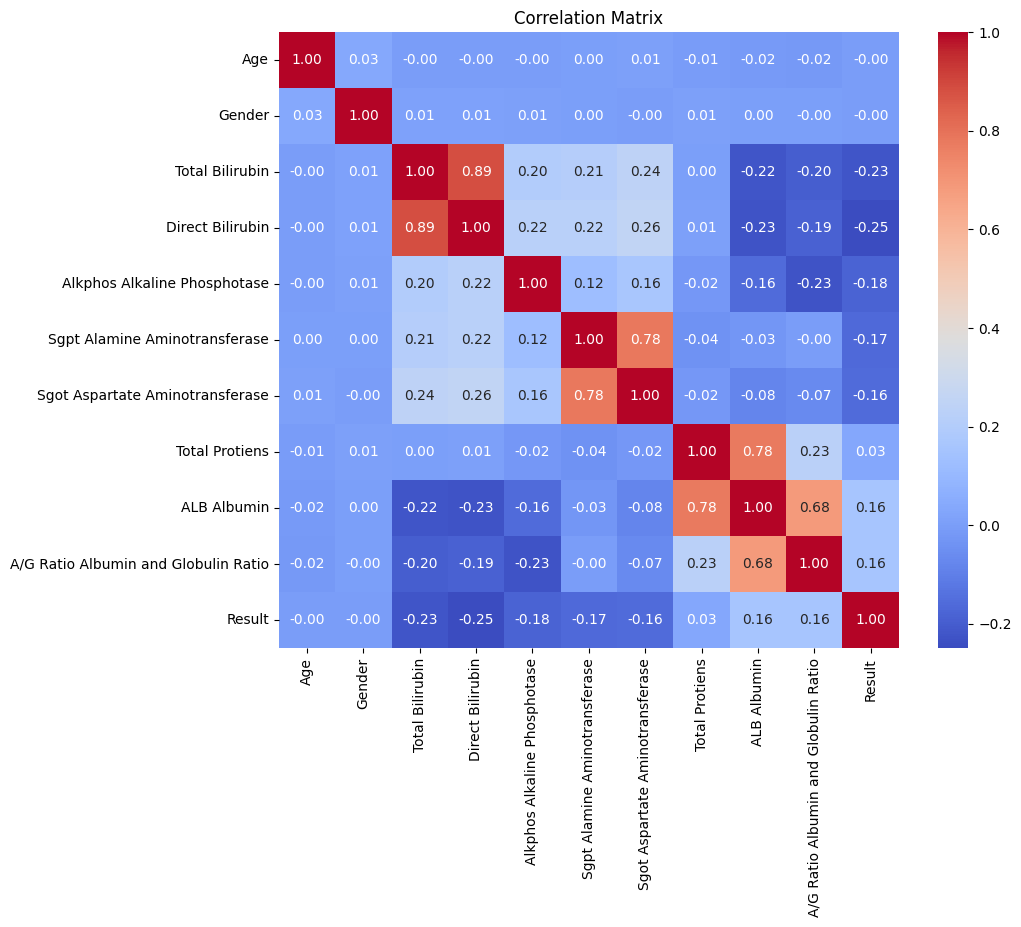

In [72]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Visualization

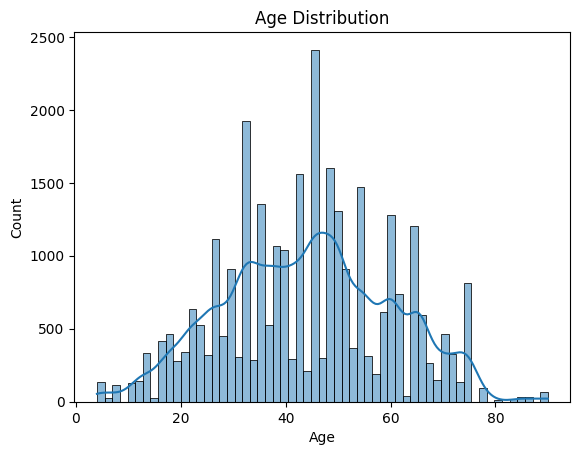

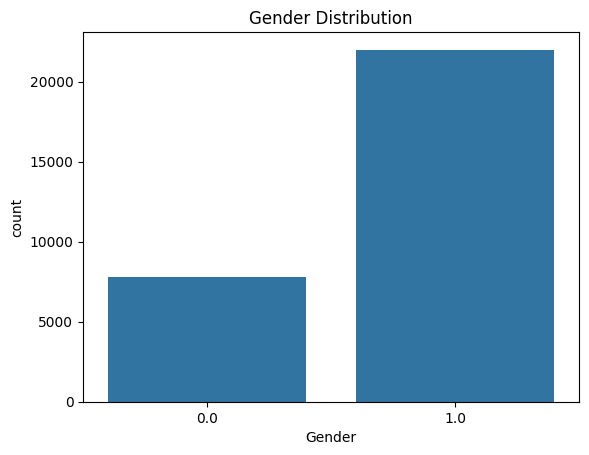

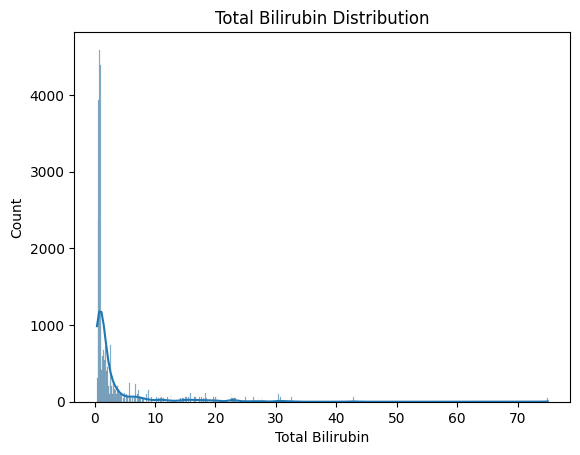

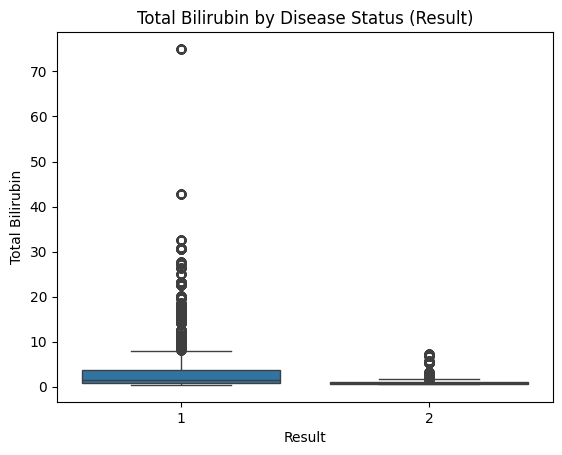

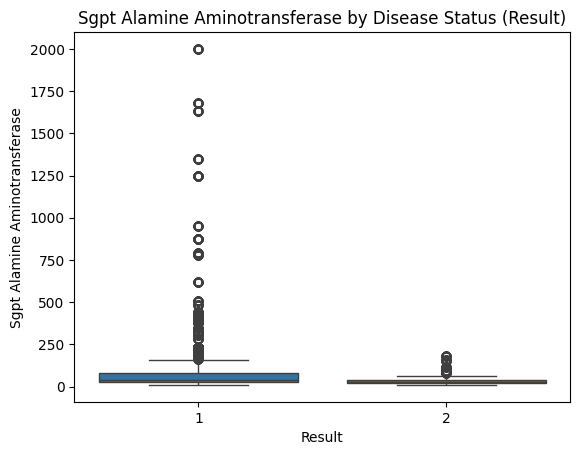

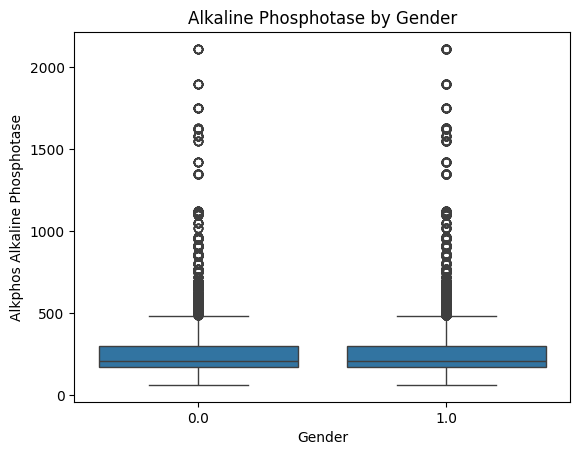

In [73]:
# visualization
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# total Bilirubin levels
sns.histplot(df['Total Bilirubin'], kde=True)
plt.title('Total Bilirubin Distribution')
plt.show()
sns.boxplot(x='Result', y='Total Bilirubin', data=df)
plt.title('Total Bilirubin by Disease Status (Result)')
plt.show()

# highly correlated variables
sns.boxplot(x='Result', y='Sgpt Alamine Aminotransferase', data=df)
plt.title('Sgpt Alamine Aminotransferase by Disease Status (Result)')
plt.show()

sns.boxplot(x='Gender', y='Alkphos Alkaline Phosphotase', data=df)
plt.title('Alkaline Phosphotase by Gender')
plt.show()


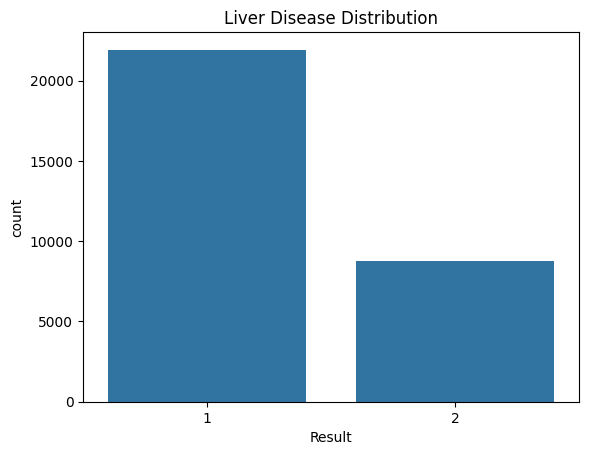

In [74]:
# y
sns.countplot(x='Result', data=df)
plt.title('Liver Disease Distribution')
plt.show()


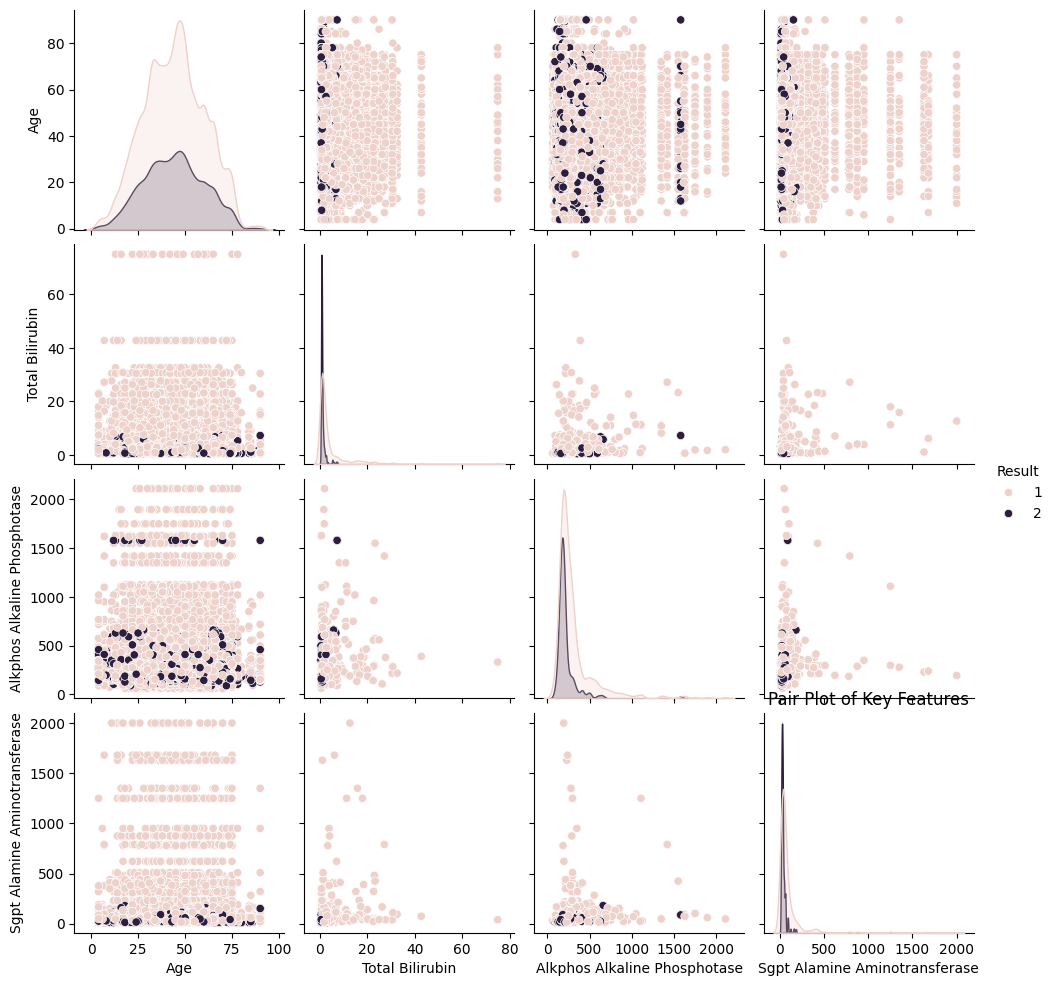

In [75]:
# key features
sns.pairplot(df[['Age', 'Total Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Result']], hue='Result')
plt.title('Pair Plot of Key Features')
plt.show()


## Missing value

In [76]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Age                                       2
Gender                                  902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


## Outliers

In [77]:
# Detect outliers using IQR method
# Convert boolean columns to numeric (int) before calculating quantiles
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns

Q1 = numeric_df.quantile(0.05)
Q3 = numeric_df.quantile(0.95)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers (using numeric columns only)
outliers_iqr = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print("\nOutliers detected using IQR method:\n", outliers_iqr)


Outliers detected using IQR method:
 Age                                       0
Gender                                    0
Total Bilirubin                         105
Direct Bilirubin                          0
Alkphos Alkaline Phosphotase            339
Sgpt Alamine Aminotransferase           633
Sgot Aspartate Aminotransferase         293
Total Protiens                            0
ALB Albumin                               0
A/G Ratio Albumin and Globulin Ratio      0
Result                                    0
dtype: int64


# Data Preparation/Feature Engineering

## Clean outliers

In [79]:
# Cap outliers at the 5th and 95th percentile for selected features
for col in ['Total Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
            'Sgot Aspartate Aminotransferase']:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower, upper)

## Feature Engineering

In [80]:
# Handle missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

num_cols = ['Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
            'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
            'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Log transformation (avoid skewness)
log_transform_cols = ['Total Bilirubin', 'Direct Bilirubin', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']
for col in log_transform_cols:
    df[col] = np.log1p(df[col])  # np.log1p(x) = log(1 + x) to avoid log(0) error

# Create new features
df['Bilirubin Ratio'] = df['Direct Bilirubin'] / df['Total Bilirubin']
df['SGOT/SGPT Ratio'] = df['Sgot Aspartate Aminotransferase'] / df['Sgpt Alamine Aminotransferase']
df['Protien Ratio'] = df['ALB Albumin'] / df['Total Protiens']

# Group by age
bins = [0, 18, 40, 60, 100]
labels = ['Child', 'Young', 'Middle-aged', 'Old']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# One-hot encode categorical variable
df = pd.get_dummies(df, columns=['Age Group'], drop_first=True)

# Remove highly correlated features to avoid multicollinearity
df = df.drop(columns=['Direct Bilirubin'])  # Highly correlated with Total Bilirubin


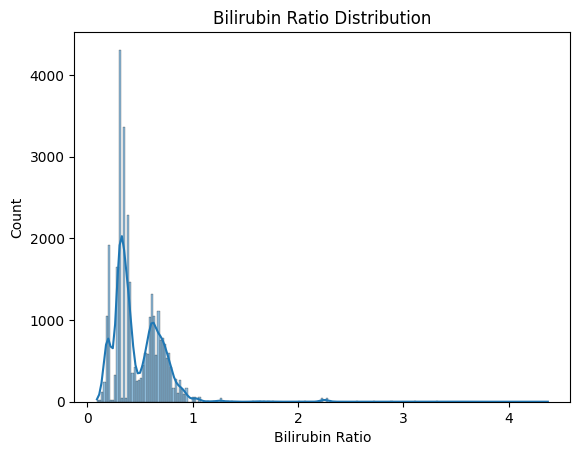

In [81]:
sns.histplot(df['Bilirubin Ratio'], kde=True)
plt.title('Bilirubin Ratio Distribution')
plt.show()

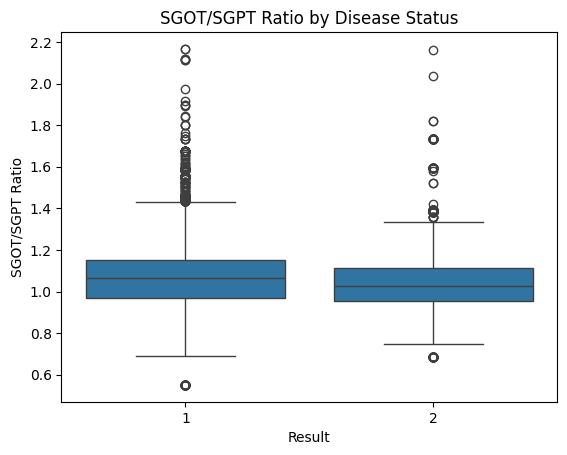

In [82]:
sns.boxplot(x='Result', y='SGOT/SGPT Ratio', data=df)
plt.title('SGOT/SGPT Ratio by Disease Status')
plt.show()

## PCA

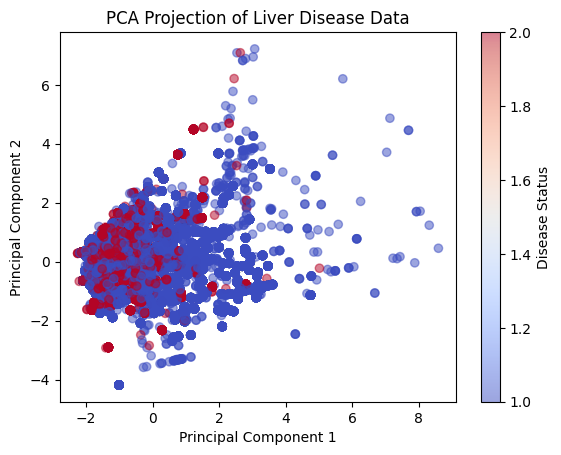

Explained variance ratio: [0.53403442 0.28552017]


In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# choose features for PCA
features = ['SGOT/SGPT Ratio', 'Bilirubin Ratio', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']
X = df[features]

# standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# visualization for PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Result'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Liver Disease Data')
plt.colorbar(label='Disease Status')
plt.show()

# variance ratio of PCA principal components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

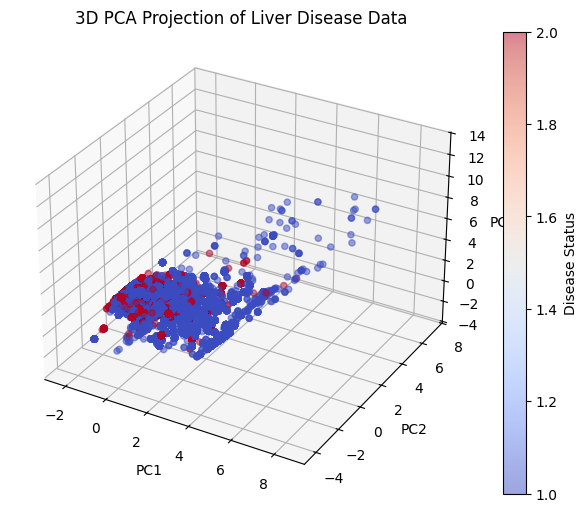

In [84]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=df['Result'], cmap='coolwarm', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection of Liver Disease Data')
plt.colorbar(scatter, label='Disease Status')
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns] = scaler.fit_transform(df)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = df.drop(columns=['Result'])
y = df['Result']
X = X.fillna(X.median())
model = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(model, n_features_to_select=10)  # 10 features

X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Total Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Bilirubin Ratio', 'SGOT/SGPT Ratio', 'Protien Ratio'],
      dtype='object')


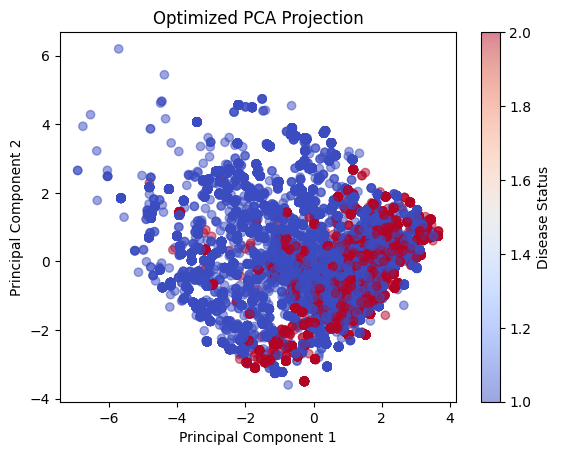

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled[selected_features])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Optimized PCA Projection')
plt.colorbar(label='Disease Status')
plt.show()

# Methodology and various tools used in the process

## Logistcal

## Rondom Forest

## KNN

## FNN

# Evaluation

## Lostical

## Random Forest

## KNN

## FNN